## Exploratory Data Analysis

### Import Libaries

In [79]:
# Import Libraries

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import pandas as pd
import matplotlib as mpl
# import chart_studio.plotly as py
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# from geopy import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
%matplotlib inline

### Load Data

In [80]:
# Run the file Data_Preprocessing.ipynb which cleaned the data. Pre-processed data are saved in the data file

housing = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col = 0)
real_estate = pd.read_csv('data/Ames_Real_Estate_Data.csv', index_col = 0)
# combined data set:
ames_df = pd.read_csv('data/final_df.csv', index_col = 0)

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
housing.shape

(2580, 91)

In [82]:
ames_df.shape

(2603, 179)

Text(0.5, 1, 'Ames Dataframe NA Values')

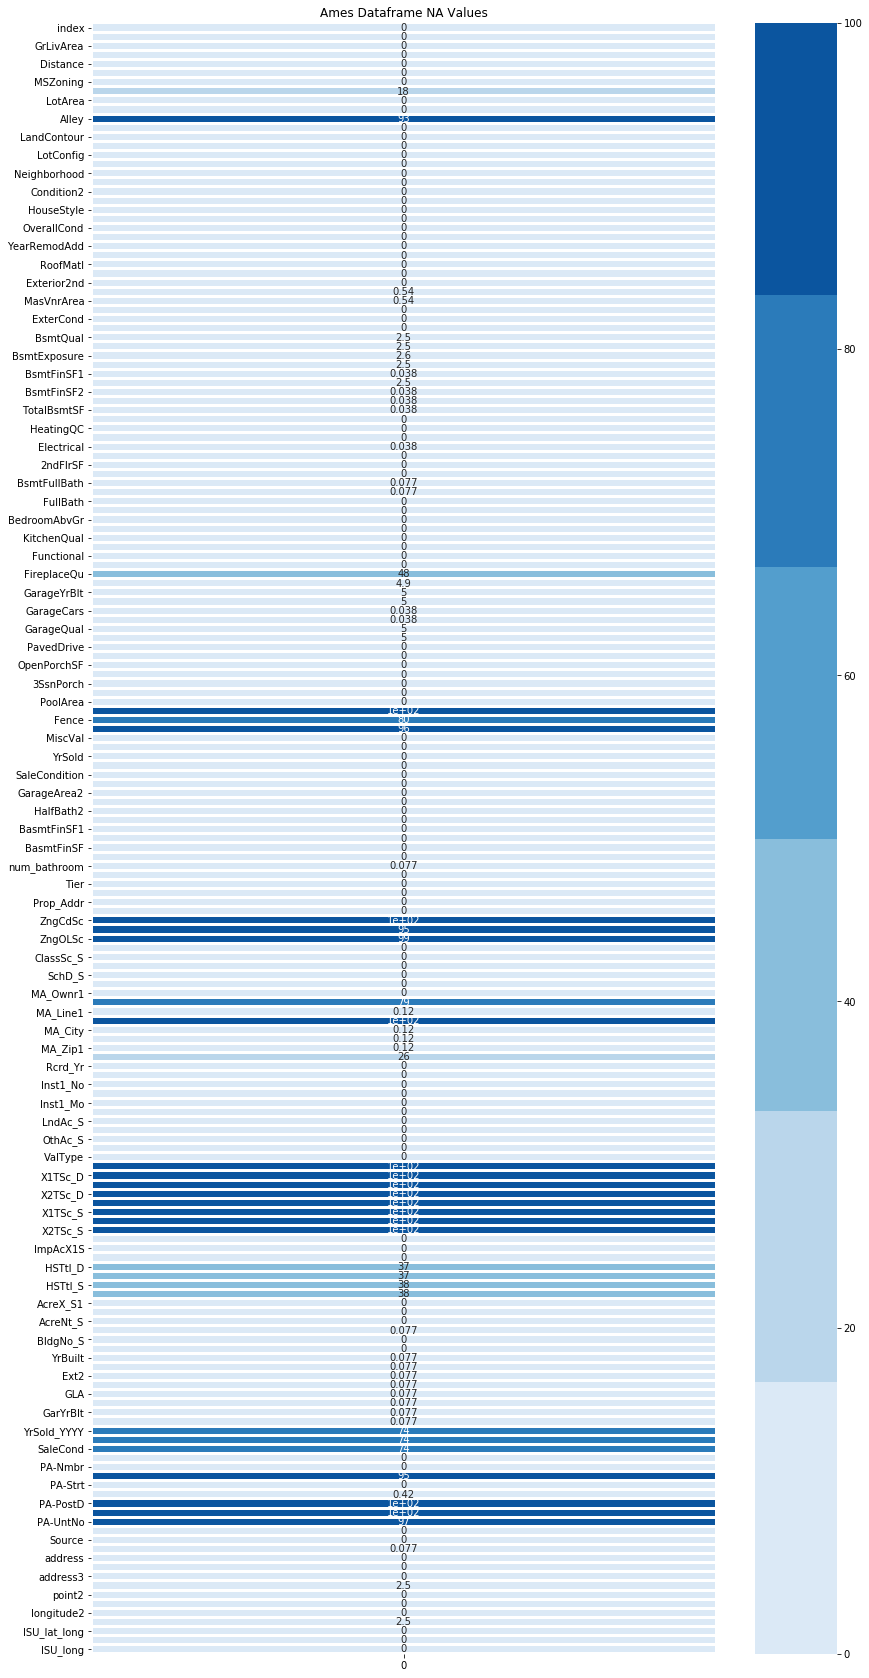

In [83]:
from IPython.display import display, HTML

cm = sns.light_palette("green",as_cmap=True)
plt.figure(figsize=(14,30))

sns.heatmap(pd.DataFrame(ames_df.isnull().sum()/ames_df.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.title("Ames Dataframe NA Values")

### Correlation Graph

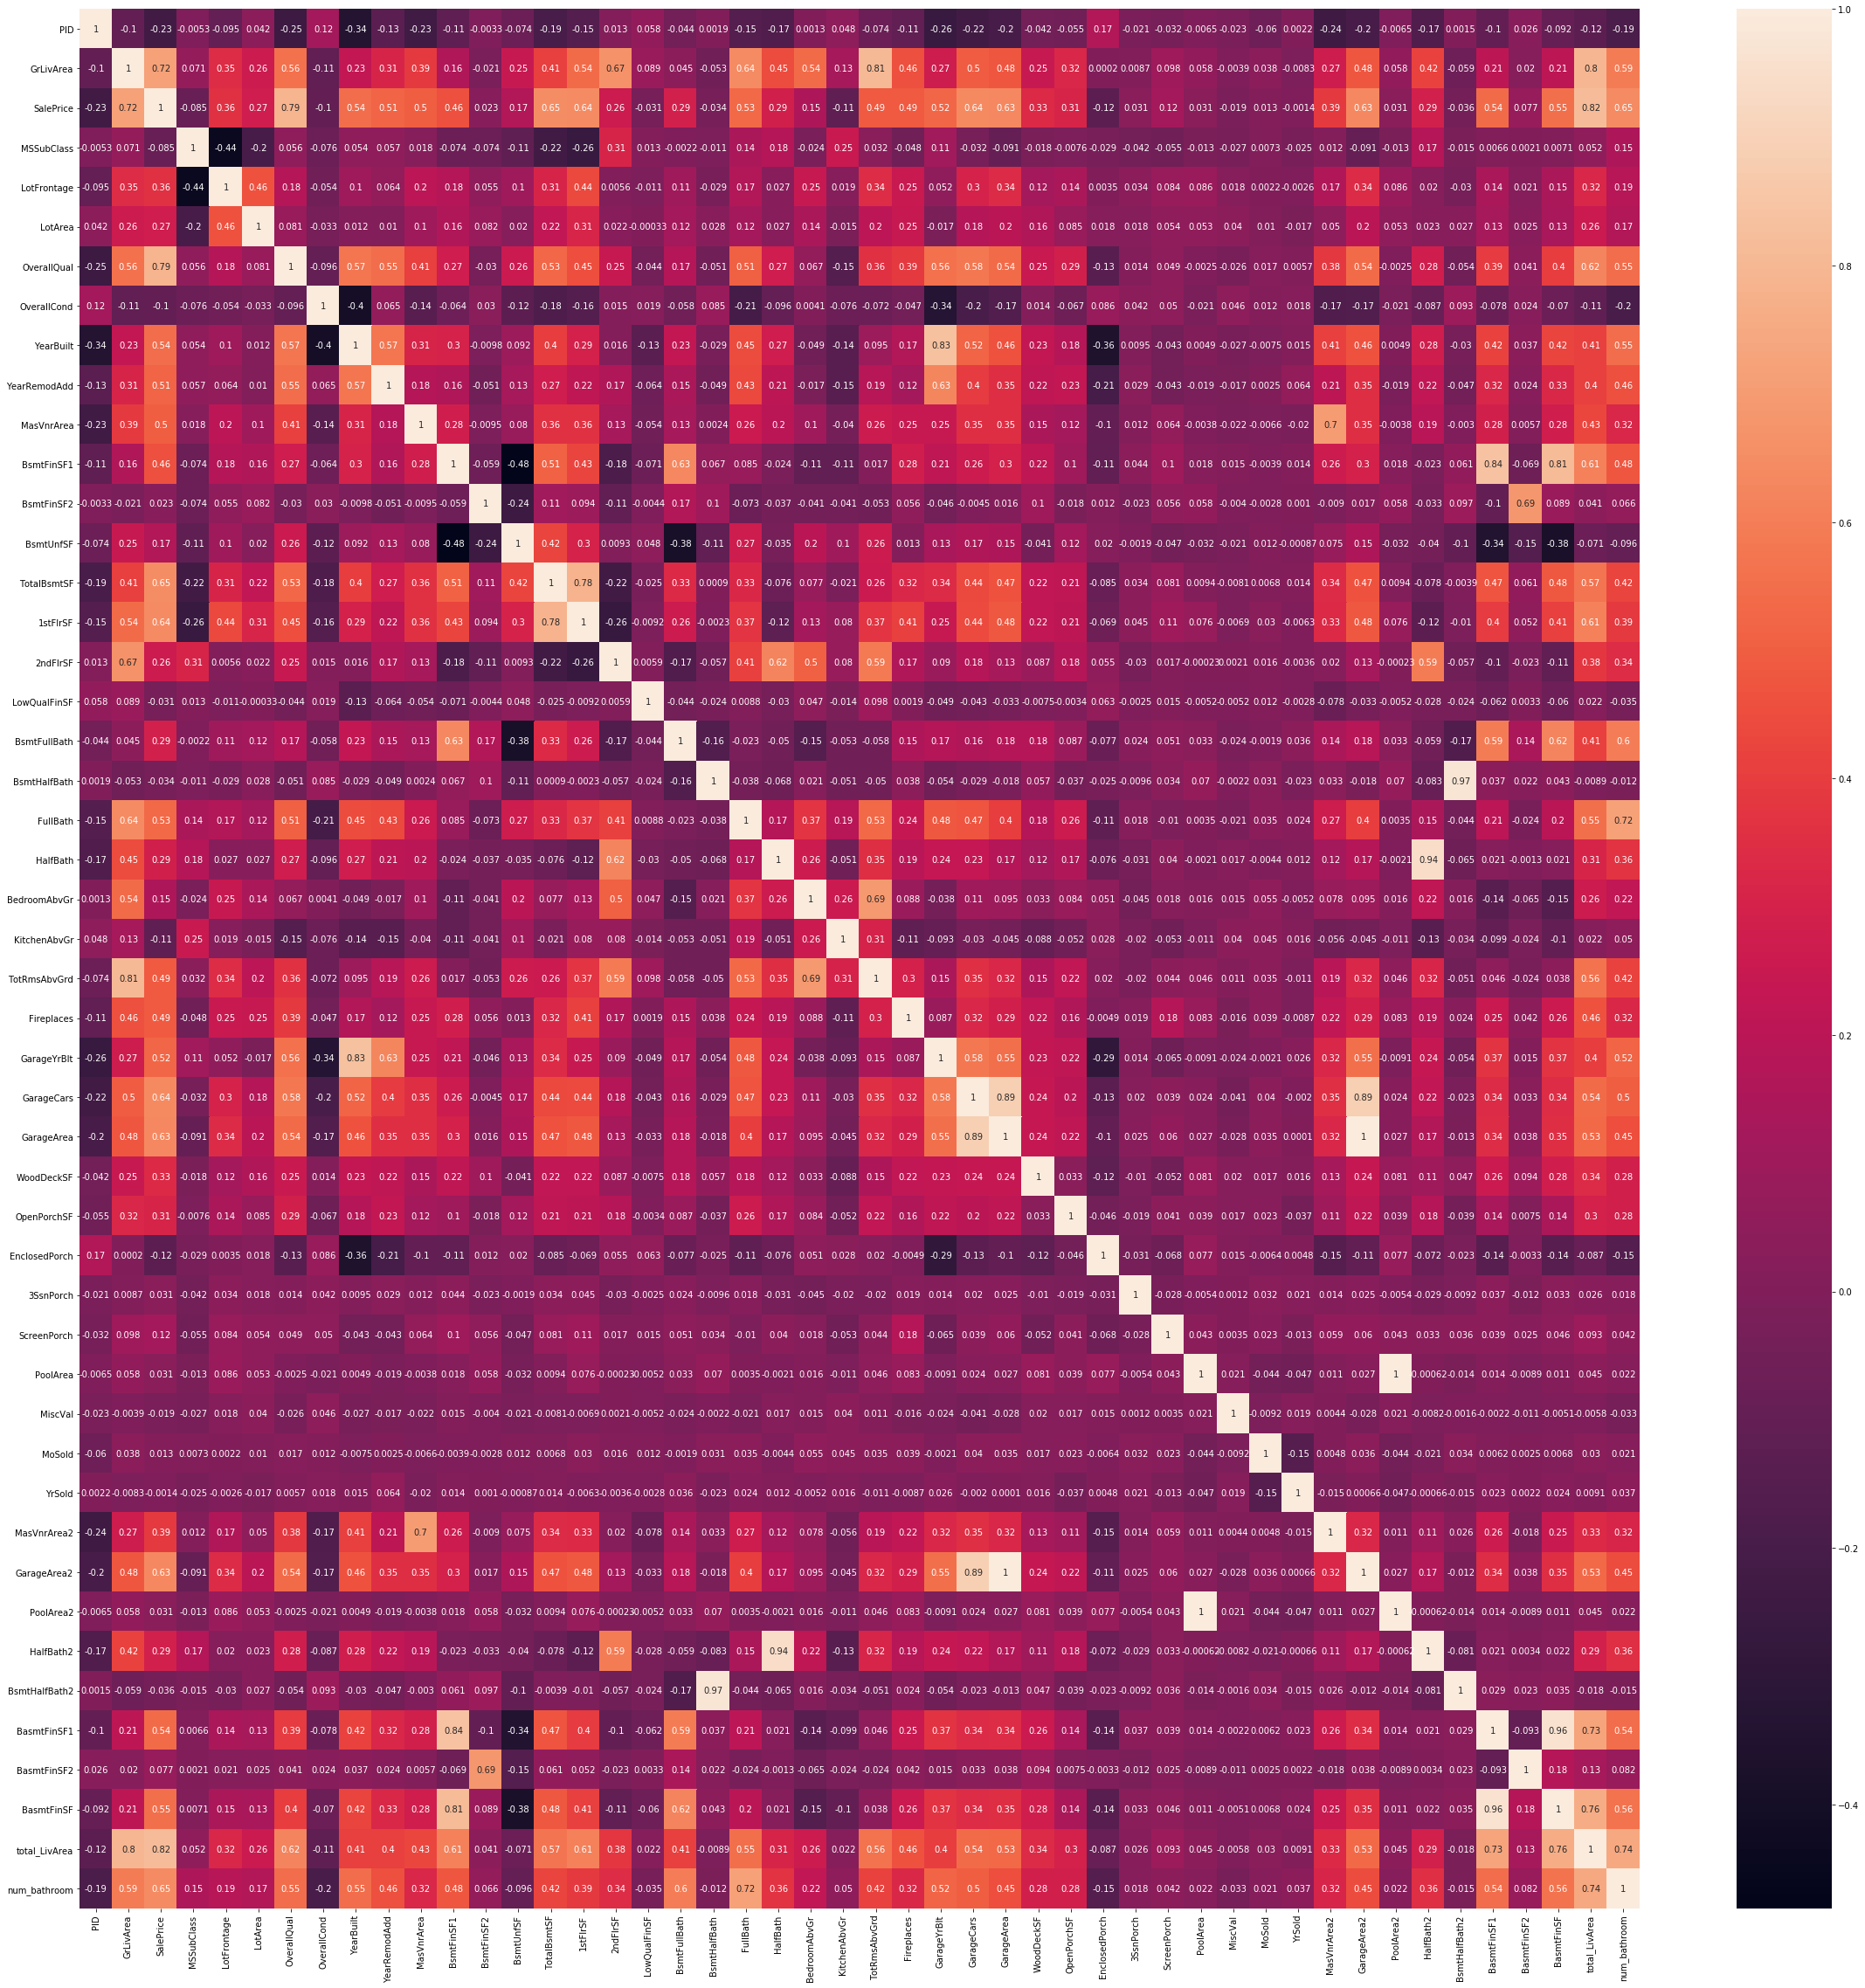

In [84]:
corr=housing.corr()
plt.figure(figsize = (40,40))
sns.heatmap(corr,annot=True)

### Target Variable

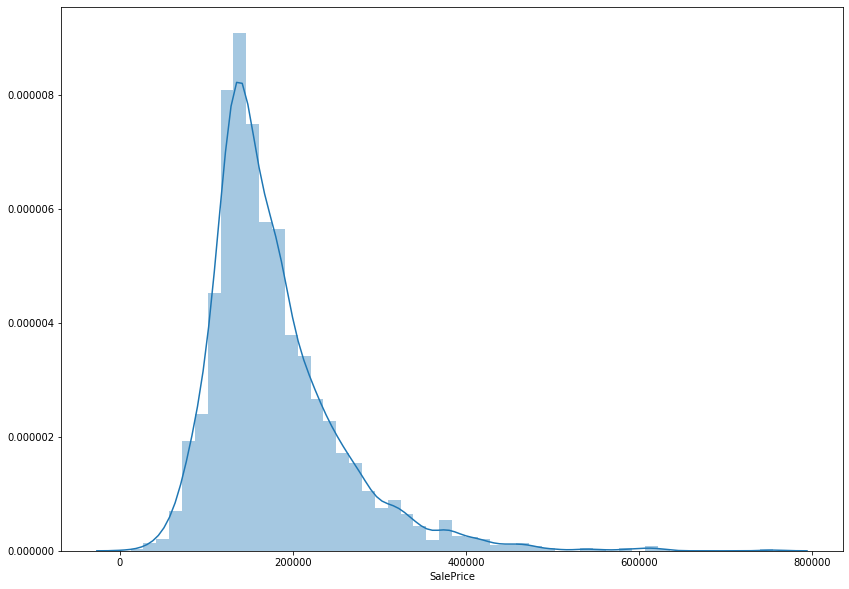

In [85]:
# SalePrice Histogram
plt.figure(figsize = (14,10))
sns.distplot(housing['SalePrice']);

<Figure size 1008x720 with 0 Axes>

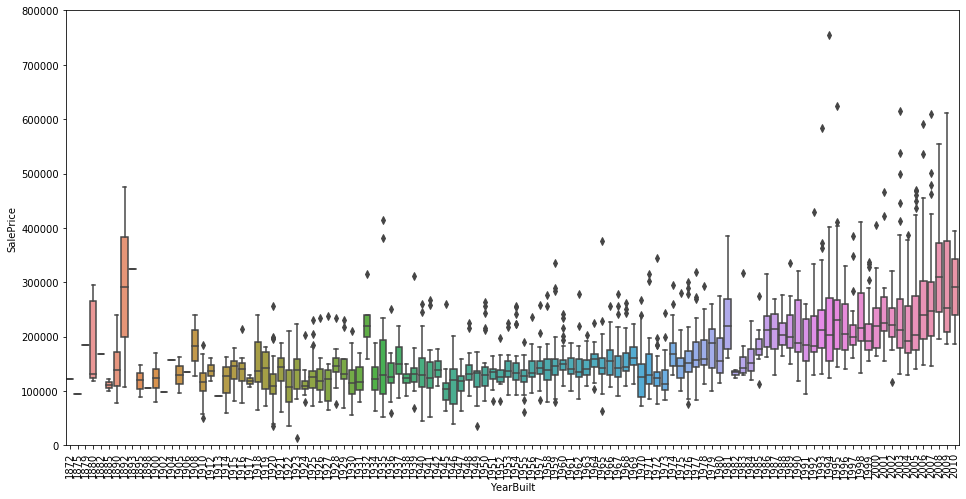

In [86]:
var = 'YearBuilt'
plt.figure(figsize = (14,10))
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Daniel

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x432 with 0 Axes>

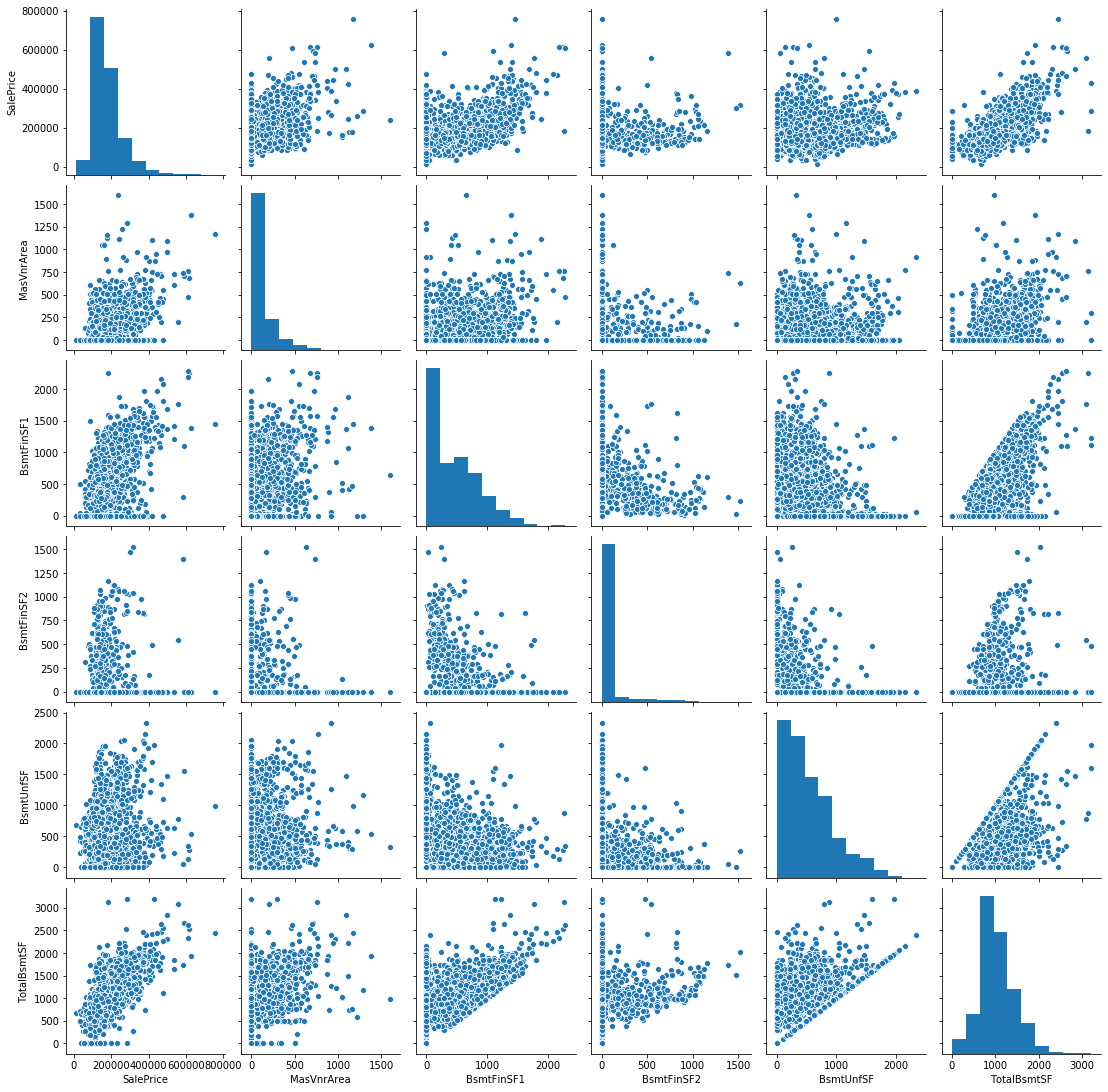

In [87]:
plt.figure(figsize = (14,6))
cols1 = ['SalePrice', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
sns.pairplot(housing[cols1], size = 2.5)
plt.show()

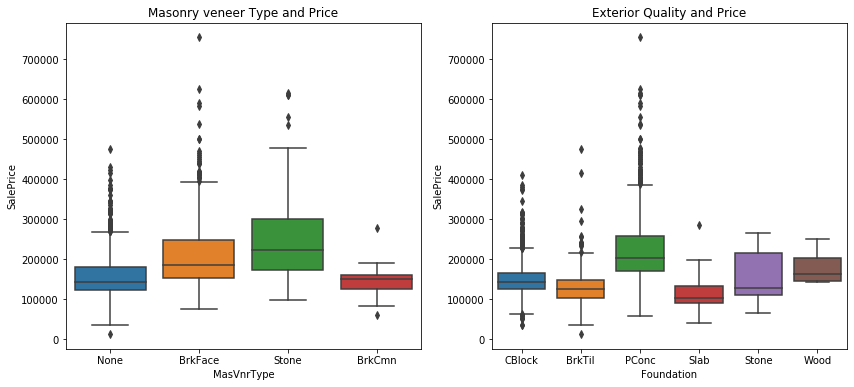

In [88]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1).set_title('Masonry veneer Type and Price')
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing)
plt.subplot(1,2,2).set_title("Exterior Quality and Price")
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)

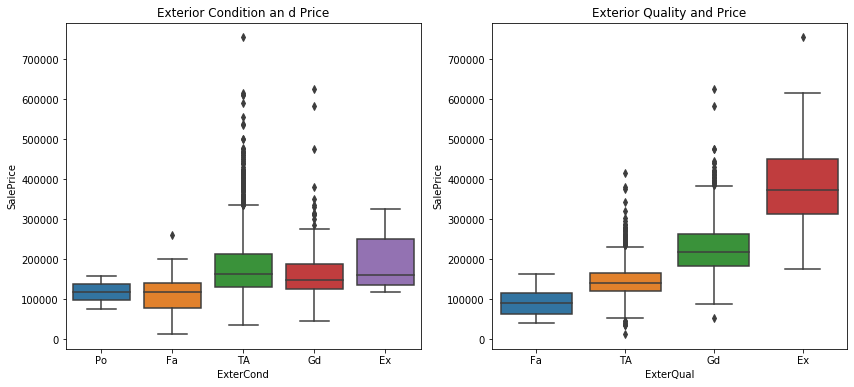

In [89]:
# Exterior Condition / Quality and Pirce
plt.figure(figsize = (14,6))
plt.subplot(1,2,1).set_title("Exterior Condition an d Price")
sns.boxplot(x = 'ExterCond', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(1,2,2).set_title("Exterior Quality and Price")
sns.boxplot(x = 'ExterQual', y = 'SalePrice', order=["Fa","TA","Gd", "Ex"], data = housing)

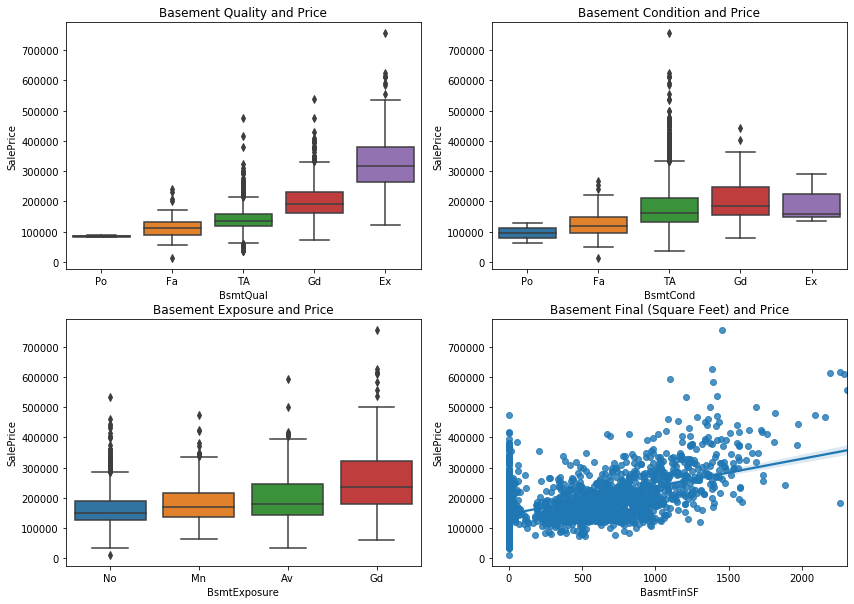

In [90]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1).set_title("Basement Quality and Price")
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(2,2,2).set_title("Basement Condition and Price")
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(2,2,3).set_title("Basement Exposure and Price")
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', order=["No","Mn","Av","Gd"], data = housing)
plt.subplot(2,2,4).set_title("Basement Final (Square Feet) and Price")
sns.regplot(x = 'BasmtFinSF', y = 'SalePrice', data = housing)

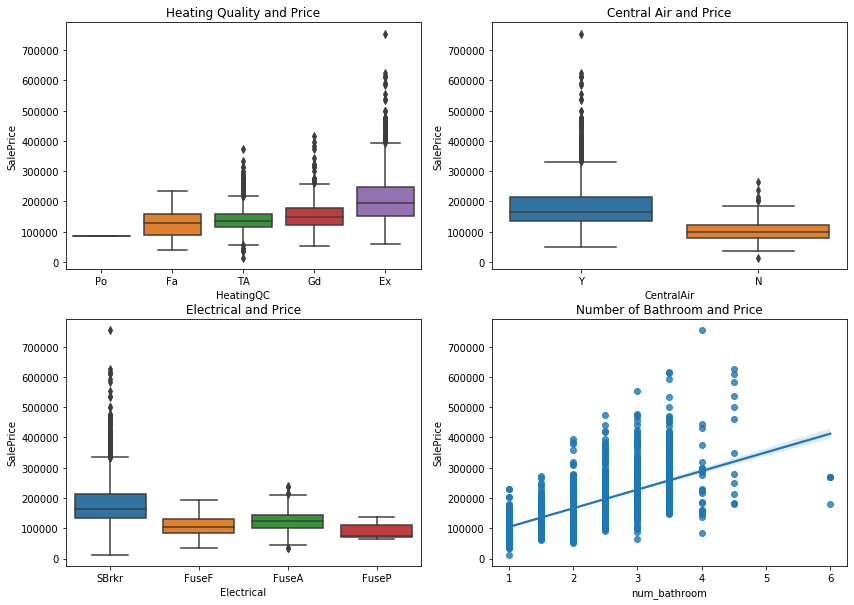

In [91]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1).set_title("Heating Quality and Price")
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(2,2,2).set_title("Central Air and Price")
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing)
plt.subplot(2,2,3).set_title("Electrical and Price")
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing)
plt.subplot(2,2,4).set_title("Number of Bathroom and Price")
sns.regplot(x = 'num_bathroom', y = 'SalePrice', data = housing)

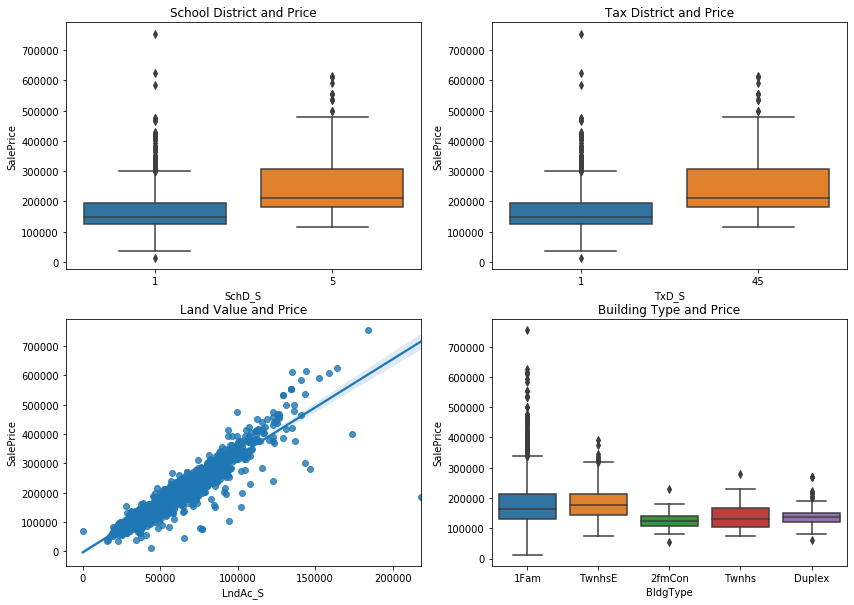

In [92]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1).set_title("School District and Price")
sns.boxplot(x = 'SchD_S', y = 'SalePrice', data = ames_df)
plt.subplot(2,2,2).set_title("Tax District and Price")
sns.boxplot(x = 'TxD_S', y = 'SalePrice', data = ames_df)
plt.subplot(2,2,3).set_title("Land Value and Price")
sns.regplot(x = 'LndAc_S', y = 'SalePrice', data = ames_df)
plt.subplot(2,2,4).set_title("Building Type and Price")
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = ames_df)

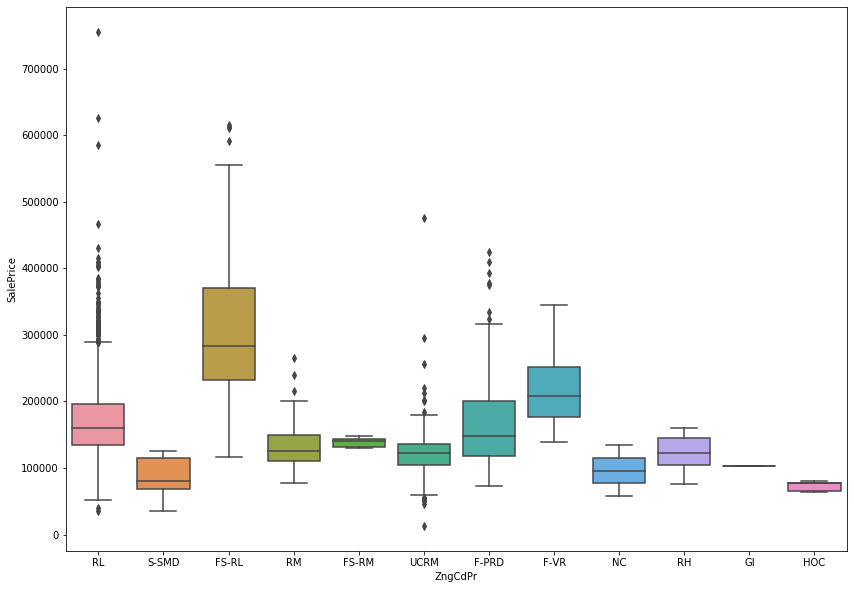

In [93]:
plt.figure(figsize = (14,10))
sns.boxplot(x = 'ZngCdPr', y = 'SalePrice', data = ames_df)

<Figure size 1008x720 with 0 Axes>

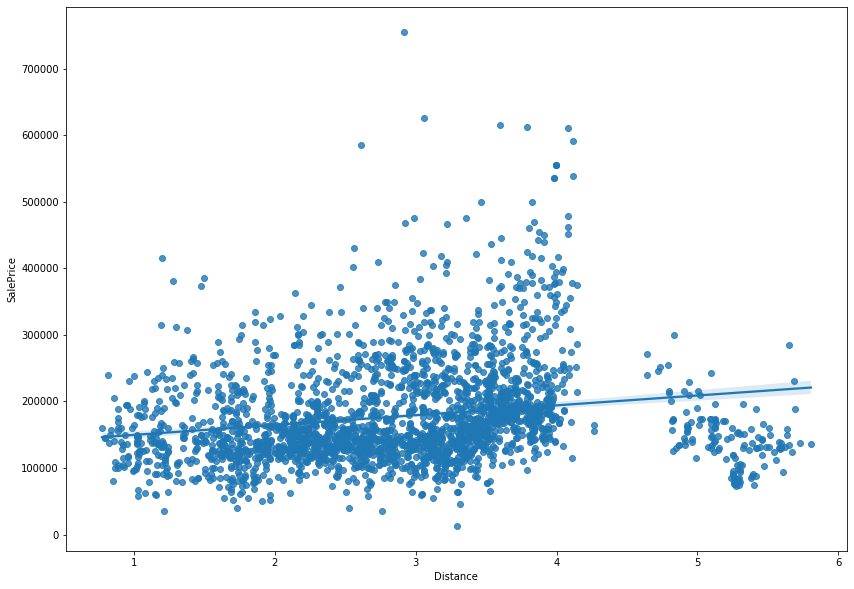

In [94]:
plt.figure(figsize = (14,10))
# Distance VS Sale Price
plt.figure(figsize = (14,10))
sns.regplot(x = 'Distance', y = 'SalePrice', data = ames_df)

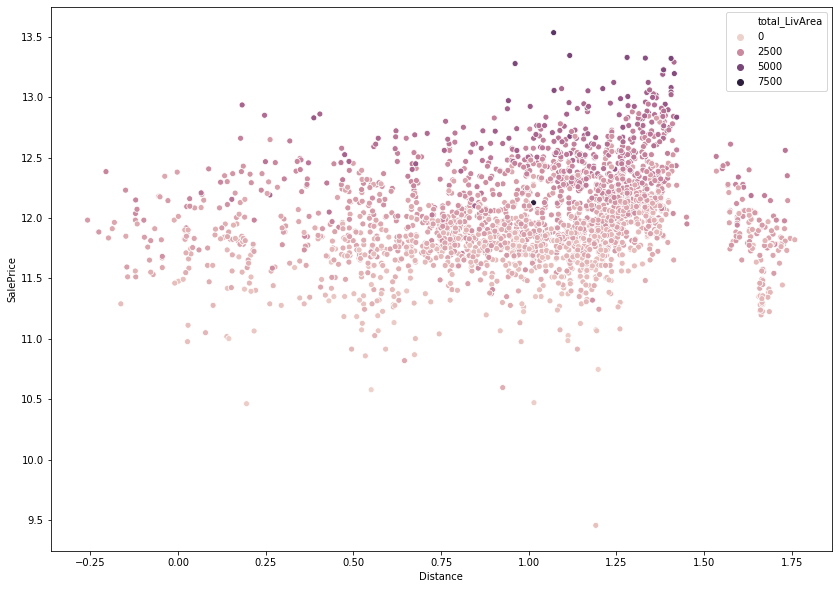

In [95]:
# Distance VS Sale Price
plt.figure(figsize = (14,10))
log_distance = np.log(ames_df['Distance'])
log_SalePrice= np.log(ames_df['SalePrice'])
sns.scatterplot(x = log_distance, y = log_SalePrice , hue = 'total_LivArea', data = ames_df)

### Neighborhood Visualization

In [96]:
n = len(pd.unique(ames_df['Neighborhood'])) 
  
print("No.of.unique values :",  n)

No.of.unique values : 26


In [97]:
ames_df.Neighborhood.unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NridgHt', 'NAmes', 'CollgCr', 'SawyerW', 'MeadowV',
       'BrDale', 'Gilbert', 'Timber', 'Somerst', 'BrkSide', 'NoRidge',
       'Sawyer', 'Crawfor', 'Greens', 'ClearCr', 'StoneBr', 'Veenker',
       'NPkVill', 'Blueste'], dtype=object)

In [98]:
ames_df['Neighborhood'].isnull().sum()

0

In [99]:
geo_heatmap = {
    'Neighborhood' : ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards',\
        'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes','OldTown',\
        'SWISU','Sawyer','SawyerW', 'Somerst', 'StoneBr', 'Timber','Veenker', 'Greens'],\
    'Latitude' : [42.0563761, 42.0218678, 42.052795, 42.024546, 42.0360959, 42.0214232, 42.028025, 42.0154024,\
        42.1068177, 42.0204395, 41.997282, 41.9903084, 42.046618, 42.048164, 42.0258352, 42.0597732, 42.0457802,\
        42.029046, 42.0266187, 42.0295218, 42.034611, 42.0508817, 42.0595539, 41.9999732, 42.0413042, 42.001350383364695],\
    'Longitude' : [-93.6466598, -93.6702853, -93.6310097, -93.6545201, -93.6575849, -93.6584089, -93.6093286,
        -93.6875441, -93.6553512, -93.6243787, -93.6138098, -93.603242, -93.6362807, -93.6496766, -93.6613958,
        -93.65166, -93.6472075, -93.6165288, -93.6486541, -93.7102833, -93.7024257, -93.6485768, -93.6365891,
        -93.6518812, -93.6524905, -93.6446034587931]
}

In [100]:
ames_neighborhood = set(ames_df['Neighborhood'].tolist())

geo_dataframe = pd.DataFrame.from_dict(geo_heatmap)

geo_dataframe = geo_dataframe[geo_dataframe['Neighborhood'].isin(ames_neighborhood)]

geo_dataframe["SalePrice"] = pd.Series(ames_df.groupby(["Neighborhood"]).mean()["SalePrice"].values,\
                                       index = geo_dataframe.index)

import folium
from folium.plugins import HeatMap

max_amount = float(geo_dataframe['SalePrice'].max())
hmap = folium.Map(location = [42.045042,-93.6473567], zoom_start = 12)
hm_wide = HeatMap(list(zip(geo_dataframe.Latitude.values, geo_dataframe.Longitude.values,\
                              geo_dataframe.SalePrice.values)),
                   min_opacity = 0.4,
                   max_val = max_amount,
                       radius = 40,
                   blur = 20,
                   max_zoom = 1
                  )
hmap.add_child(hm_wide)

In [101]:
geo_dataframe.head()

Neighborhood   Latitude  Longitude      SalePrice
0      Blmngtn  42.056376 -93.646660  196237.173913
1      Blueste  42.021868 -93.670285  143590.000000
2       BrDale  42.052795 -93.631010  106491.666667
3      BrkSide  42.024546 -93.654520  126116.105769
4      ClearCr  42.036096 -93.657585  216020.512821

In [102]:
ames_df.columns

Index(['index', 'PID', 'GrLivArea', 'SalePrice', 'Distance', 'MSSubClass',
       'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       ...
       'address2', 'address3', 'location2', 'point2', 'latitude2',
       'longitude2', 'altitude2', 'ISU_lat_long', 'ISU_lat', 'ISU_long'],
      dtype='object', length=179)

In [103]:
geo_dataframe2 = ames_df[['address2', 'latitude2', 'longitude2', 'SalePrice']]

In [104]:
geo_dataframe2.head()

address2  latitude2  longitude2  SalePrice
0   436  HAYWARD AVE, AMES, IA  42.018564  -93.651619     126000
1      3416  WEST ST, AMES, IA  42.024855  -93.663671     139500
2      3416  WEST ST, AMES, IA  42.024855  -93.663671     139500
3       320 S 2ND ST, AMES, IA  42.021548  -93.614068     124900
4  1524  DOUGLAS AVE, AMES, IA  42.037391  -93.612207     114000

In [105]:
n = len(pd.unique(geo_dataframe2['address2'])) 
  
print("No.of.unique values :",  n)

No.of.unique values : 2552


In [106]:
ames_neighborhood2 = set(ames_df['address2'].tolist())

In [107]:
geo_dataframe2 = geo_dataframe2[geo_dataframe2['address2'].isin(ames_neighborhood2)]

In [108]:
ames_neighborhood = set(geo_dataframe2['address2'].tolist())

geo_dataframe2 = geo_dataframe2[geo_dataframe2['address2'].isin(ames_neighborhood)]
geo_dataframe2

address2  latitude2  longitude2  SalePrice
0        436  HAYWARD AVE, AMES, IA  42.018564  -93.651619     126000
1           3416  WEST ST, AMES, IA  42.024855  -93.663671     139500
2           3416  WEST ST, AMES, IA  42.024855  -93.663671     139500
3            320 S 2ND ST, AMES, IA  42.021548  -93.614068     124900
4       1524  DOUGLAS AVE, AMES, IA  42.037391  -93.612207     114000
...                             ...        ...         ...        ...
2598  1021  RIDGEWOOD AVE, AMES, IA  42.032102  -93.626373     121000
2599       3619  MARY CIR, AMES, IA  42.027669  -93.666138     139600
2600      2140  SUNSET DR, AMES, IA  42.020129  -93.643832     145000
2601   5319  CLEMENS BLVD, AMES, IA  42.016802  -93.689748     217500
2602     1025  VERMONT CT, AMES, IA  42.031579  -93.682232     215000

[2603 rows x 4 columns]

In [109]:
geo_dataframe2["SalePrice"] = pd.Series(geo_dataframe2.groupby(["address2"]).mean()["SalePrice"].values)

In [110]:
geo_dataframe2['SalePrice'].isnull().sum()

51

In [111]:
geo_dataframe2.dropna()

address2  latitude2  longitude2  SalePrice
0      436  HAYWARD AVE, AMES, IA  42.018564  -93.651619   115000.0
1         3416  WEST ST, AMES, IA  42.024855  -93.663671   155000.0
2         3416  WEST ST, AMES, IA  42.024855  -93.663671   142953.0
3          320 S 2ND ST, AMES, IA  42.021548  -93.614068   189000.0
4     1524  DOUGLAS AVE, AMES, IA  42.037391  -93.612207   239900.0
...                           ...        ...         ...        ...
2547  124  FRANKLIN AVE, AMES, IA  42.023920  -93.664400   153000.0
2548      1213 S 2ND ST, AMES, IA  42.021697  -93.627081   137000.0
2549   3412  ONTARIO ST, AMES, IA  42.034407  -93.663912    12789.0
2550     2041  DUFF AVE, AMES, IA  42.042837  -93.610973   127000.0
2551    821  CRYSTAL ST, AMES, IA  41.996897  -93.599957   134900.0

[2552 rows x 4 columns]

### Display all locations with points on the map

In [112]:
import geopandas as gpd
nbh_geo_df = gpd.read_file('data/map.geojson', driver='GeoJSON')
nbh_geo_df

Neighborhood  \
0                  City Center   
1          24th St / Grand Ave   
2         E 13th St / Duff Ave   
3   S Duff Ave / E Lincoln Way   
4          Grand Ave / 30th St   
5        Stange Rd / Pammel Ct   
6        Iowa State University   
7        Woodland St / West St   
8                      Ontario   
9      Lincoln Way / 500th Ave   
10     Lincoln Way / State Ave   
11     S Duff Ave / Airport Rd   
12                     Gilbert   

                                             geometry  
0   POLYGON ((-93.62326 42.06548, -93.62051 42.055...  
1   POLYGON ((-93.62068 42.04579, -93.64017 42.045...  
2   POLYGON ((-93.63476 42.03450, -93.63373 42.033...  
3   POLYGON ((-93.57141 42.02896, -93.61656 42.023...  
4   POLYGON ((-93.64240 42.05643, -93.63450 42.045...  
5   POLYGON ((-93.64480 42.04540, -93.64480 42.035...  
6   POLYGON ((-93.65570 42.03450, -93.65630 42.034...  
7   POLYGON ((-93.65656 42.02819, -93.66840 42.028...  
8   POLYGON ((-93.69887 42.03457, -93.69905 42.022...  
9   POLYGON ((-93.69887 42.02245, -93.69879 42.014...  
10  POLYGON ((-93.65905 42.02252, -93.65888 42.007...  
11  POLYGON ((-93.69896 42.01442, -93.69844 41.965...  
12  POLYGON ((-93.69887 42.03463, -93.65664 42.034...

In [113]:
ames_df2 = ames_df.copy()

In [114]:
neighborhood_new = []
for row in ames_df['Neighborhood']:
   if row == 'Blmngtn': neighborhood_new.append('Gilbert')
   if row == 'Blueste': neighborhood_new.append('Lincoln Way / State Ave')
   if row == 'BrDale': neighborhood_new.append('Grand Ave / 30th St')
   if row == 'BrkSide': neighborhood_new.append('E 13th St / Duff Ave')
   if row == 'ClearCr': neighborhood_new.append('Ontario')
   if row == 'CollgCr': neighborhood_new.append('Lincoln Way / 500th Ave')
   if row == 'Crawfor': neighborhood_new.append('S Duff Ave / E Lincoln Way')
   if row == 'Edwards': neighborhood_new.append('Woodland St / West St')
   if row == 'Gilbert': neighborhood_new.append('Gilbert')
   if row == 'IDOTRR' : neighborhood_new.append('S Duff Ave / E Lincoln Way')
   if row == 'MeadowV': neighborhood_new.append('S Duff Ave / Airport Rd')
   if row == 'Mitchel': neighborhood_new.append('S Duff Ave / Airport Rd')
   if row == 'NAmes': neighborhood_new.append('City Center')
   if row == 'NoRidge': neighborhood_new.append('Gilbert')
   if row == 'NPkVill': neighborhood_new.append('Grand Ave / 30th St')
   if row == 'NridgHt': neighborhood_new.append('Gilbert')
   if row == 'NWAmes': neighborhood_new.append('24th St / Grand Ave')
   if row == 'OldTown': neighborhood_new.append('E 13th St / Duff Ave')
   if row == 'SWISU': neighborhood_new.append('Lincoln Way / State Ave')
   if row == 'Sawyer': neighborhood_new.append('Ontario')
   if row == 'SawyerW': neighborhood_new.append('Ontario')
   if row == 'Somerst' : neighborhood_new.append('Grand Ave / 30th St')
   if row == 'StoneBr': neighborhood_new.append('Grand Ave / 30th St')
   if row == 'Timber': neighborhood_new.append('S Duff Ave / Airport Rd')
   if row == 'Veenker': neighborhood_new.append('Stange Rd / Pammel Ct')
   if row == 'Greens': neighborhood_new.append('Stange Rd / Pammel Ct')
ames_df['Neighborhood_New'] = neighborhood_new

In [115]:
ames_df2 = ames_df.copy()

In [116]:
Q1 = np.percentile(ames_df2['SalePrice'], 25, interpolation = 'midpoint')
print(Q1)
Q2 = np.percentile(ames_df2['SalePrice'], 50, interpolation = 'midpoint')
print(Q2)
Q3 = np.percentile(ames_df2['SalePrice'], 75, interpolation = 'midpoint')
print(Q3)
IQR = Q3 - Q1
print(IQR)
print(1.5*IQR)
print(118500.0 + 208950.0)

129950.0
159500.0
208950.0
79000.0
118500.0
327450.0


In [117]:
SalePrice_new = []
for row in ames_df2['SalePrice']:
    if row < 129950.0 : SalePrice_new.append('$')
    elif row < 159500.0 : SalePrice_new.append('$$')
    elif row < 208950.0 : SalePrice_new.append('$$$')
    elif row < 327450.0 : SalePrice_new.append('$$$$')
    else : SalePrice_new.append('$$$$$')
ames_df2['price_type'] = SalePrice_new

In [118]:
ames_df2[['latitude2', 'longitude2', 'PID', 'price_type']]

latitude2  longitude2        PID price_type
0     42.018564  -93.651619  909176150          $
1     42.024855  -93.663671  905476230         $$
2     42.024855  -93.663671  905476230         $$
3     42.021548  -93.614068  911128020          $
4     42.037391  -93.612207  535377150          $
...         ...         ...        ...        ...
2598  42.032102  -93.626373  903205040          $
2599  42.027669  -93.666138  905402060         $$
2600  42.020129  -93.643832  909275030         $$
2601  42.016802  -93.689748  907192040       $$$$
2602  42.031579  -93.682232  906223180       $$$$

[2603 rows x 4 columns]

In [119]:
ames_df2['price_type'].isnull().sum()

0

In [120]:
from shapely.geometry import Point, shape

locs_geometry = [Point(xy) for xy in zip(ames_df2.longitude2,
                                         ames_df2.latitude2)]

crs = {'init': 'epsg:4326'}
# Coordinate Reference Systems, "epsg:4326" is a common projection of WGS84 Latitude/Longitude
locs_gdf = gpd.GeoDataFrame(ames_df2, crs=crs, geometry=locs_geometry)

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [121]:
import folium
locs_map = folium.Map(location=[42.045042, -93.6473567],
                      zoom_start=13, tiles='cartodbpositron')

feature_1 = folium.FeatureGroup(name='$')
feature_2 = folium.FeatureGroup(name='$$')
feature_3 = folium.FeatureGroup(name='$$$')
feature_4 = folium.FeatureGroup(name='$$$$')
feature_5 = folium.FeatureGroup(name='$$$$$')

for i, v in locs_gdf.iterrows():
    popup = """
    Location id : <b>%s</b><br>
    Room type : <b>%s</b><br>
    Neighbourhood : <b>%s</b><br>
    Price : <b>%d</b><br>
    """ % (v['PID'], v['price_type'], v['Neighborhood'], v['SalePrice'])
    
    if v['price_type'] == '$':
        folium.CircleMarker(location=[v['latitude2'], v['longitude2']],
                            radius=2,
                            tooltip=popup,
                            color='#264653',
                            fill_color='#264653',
                            fill=True).add_to(feature_1)
    elif v['price_type'] == '$$':
        folium.CircleMarker(location=[v['latitude2'], v['longitude2']],
                            radius=2,
                            tooltip=popup,
                            color='#2a9d8f',
                            fill_color='#2a9d8f',
                            fill=True).add_to(feature_2)
    elif v['price_type'] == '$$$':
        folium.CircleMarker(location=[v['latitude2'], v['longitude2']],
                            radius=2,
                            tooltip=popup,
                            color='#e9c46a',
                            fill_color='#e9c46a',
                            fill=True).add_to(feature_3)
    elif v['price_type'] == '$$$$':
        folium.CircleMarker(location=[v['latitude2'], v['longitude2']],
                            radius=2,
                            tooltip=popup,
                            color='#f4a261',
                            fill_color='#f4a261',
                            fill=True).add_to(feature_4)
    elif v['price_type'] == '$$$$$':
        folium.CircleMarker(location=[v['latitude2'], v['longitude2']],
                            radius=2,
                            tooltip=popup,
                            color='#e76f51',
                            fill_color='#e76f51',
                            fill=True).add_to(feature_5)

feature_1.add_to(locs_map)
feature_2.add_to(locs_map)
feature_3.add_to(locs_map)
feature_4.add_to(locs_map)
feature_5.add_to(locs_map)
folium.LayerControl(collapsed=False).add_to(locs_map)
locs_map

### Mean Sale Price by Neighborhood

In [122]:
geo_dataframe["SalePrice"] = pd.Series(ames_df.groupby(["Neighborhood"]).mean()["SalePrice"].values,\
                                       index = geo_dataframe.index)

In [123]:
ames_df3 = ames_df2.groupby(['Neighborhood_New'])['SalePrice', 'total_LivArea'].mean().reset_index()
ames_df3
ames_geo_mean_df = pd.merge(nbh_geo_df, ames_df3, left_on = 'Neighborhood', right_on='Neighborhood_New')
ames_geo_mean_df
ames_geo_mean_df['price_per_sf'] = ames_geo_mean_df['SalePrice'] / ames_geo_mean_df['total_LivArea']
ames_geo_mean_df

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Neighborhood  \
0                  City Center   
1          24th St / Grand Ave   
2         E 13th St / Duff Ave   
3   S Duff Ave / E Lincoln Way   
4          Grand Ave / 30th St   
5        Stange Rd / Pammel Ct   
6        Woodland St / West St   
7                      Ontario   
8      Lincoln Way / 500th Ave   
9      Lincoln Way / State Ave   
10     S Duff Ave / Airport Rd   
11                     Gilbert   

                                             geometry  \
0   POLYGON ((-93.62326 42.06548, -93.62051 42.055...   
1   POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
2   POLYGON ((-93.63476 42.03450, -93.63373 42.033...   
3   POLYGON ((-93.57141 42.02896, -93.61656 42.023...   
4   POLYGON ((-93.64240 42.05643, -93.63450 42.045...   
5   POLYGON ((-93.64480 42.04540, -93.64480 42.035...   
6   POLYGON ((-93.65656 42.02819, -93.66840 42.028...   
7   POLYGON ((-93.69887 42.03457, -93.69905 42.022...   
8   POLYGON ((-93.69887 42.02245, -93.69879 42.014...   
9   POLYGON ((-93.65905 42.02252, -93.65888 42.007...   
10  POLYGON ((-93.69896 42.01442, -93.69844 41.965...   
11  POLYGON ((-93.69887 42.03463, -93.65664 42.034...   

              Neighborhood_New      SalePrice  total_LivArea  price_per_sf  
0                  City Center  144926.207229    1499.122892     96.674001  
1          24th St / Grand Ave  190018.588710    2175.274194     87.353856  
2         E 13th St / Duff Ave  126360.398734    1420.186709     88.974497  
3   S Duff Ave / E Lincoln Way  160126.730994    1666.169591     96.104701  
4          Grand Ave / 30th St  219764.551440    1990.600823    110.401116  
5        Stange Rd / Pammel Ct  236364.516129    2563.161290     92.216013  
6        Woodland St / West St  131885.455090    1520.916168     86.714480  
7                      Ontario  167637.658703    1811.614334     92.534959  
8      Lincoln Way / 500th Ave  198067.408333    1969.645833    100.559910  
9      Lincoln Way / State Ave  135032.352941    1631.019608     82.790147  
10     S Duff Ave / Airport Rd  171679.402062    1903.953608     90.169950  
11                     Gilbert  259420.324022    2408.488827    107.710827

In [124]:
from branca.colormap import linear
nbh_count_colormap2 = linear.YlGnBu_09.scale(min(ames_geo_mean_df['price_per_sf']),
                                            max(ames_geo_mean_df['price_per_sf']))

nbh_locs_map2 = folium.Map(location=[42.045042, -93.6473567],
                          zoom_start = 11.5, tiles='cartodbpositron')

style_function = lambda x: {
    'fillColor': nbh_count_colormap2(x['properties']['price_per_sf']),
    'color': 'black',
    'weight': 2,
    'fillOpacity': 0.7
}

folium.GeoJson(
    ames_geo_mean_df,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['Neighborhood_New', 'price_per_sf'],
        aliases=['Neighborhood', 'Sales Price per Square Feet'],
        localize=True
    )
).add_to(nbh_locs_map2)

nbh_count_colormap2.add_to(nbh_locs_map2)
nbh_count_colormap2.caption = 'Ames Housing Sale Price by Neighborhood'
nbh_count_colormap2.add_to(nbh_locs_map2)
folium.map.CustomPane('labels').add_to(nbh_locs_map2)
folium.TileLayer('CartoDBPositronOnlyLabels',
                 pane='labels').add_to(nbh_locs_map2)
nbh_locs_map2

In [64]:
from branca.colormap import linear
nbh_count_colormap = linear.YlGnBu_09.scale(min(ames_df3['SalePrice']),
                                            max(ames_df3['SalePrice']))

nbh_locs_map = folium.Map(location=[42.045042, -93.6473567],
                          zoom_start = 11.5, tiles='cartodbpositron')

style_function = lambda x: {
    'fillColor': nbh_count_colormap(x['properties']['SalePrice']),
    'color': 'black',
    'weight': 2,
    'fillOpacity': 0.7
}

folium.GeoJson(
    ames_geo_mean_df,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['Neighborhood_New', 'SalePrice'],
        aliases=['Neighborhood_New', 'Sales Price Mean Value'],
        localize=True
    )
).add_to(nbh_locs_map)

nbh_count_colormap.add_to(nbh_locs_map)
nbh_count_colormap.caption = 'Ames Housing Sale Price by Neighborhood'
nbh_count_colormap.add_to(nbh_locs_map)
folium.map.CustomPane('labels').add_to(nbh_locs_map)
folium.TileLayer('CartoDBPositronOnlyLabels',
                 pane='labels').add_to(nbh_locs_map)
nbh_locs_map

### Show changes in terms of timing with heatmap

In [125]:
ames_df2[['SalePrice', 'Neighborhood_New', 'latitude2', 'longitude2', 'Rcrd_Yr']]

SalePrice            Neighborhood_New  latitude2  longitude2  Rcrd_Yr
0        126000     Lincoln Way / State Ave  42.018564  -93.651619     2017
1        139500       Woodland St / West St  42.024855  -93.663671     2020
2        139500       Woodland St / West St  42.024855  -93.663671     2020
3        124900  S Duff Ave / E Lincoln Way  42.021548  -93.614068     2016
4        114000        E 13th St / Duff Ave  42.037391  -93.612207     2019
...         ...                         ...        ...         ...      ...
2598     121000        E 13th St / Duff Ave  42.032102  -93.626373     2009
2599     139600       Woodland St / West St  42.027669  -93.666138     2009
2600     145000  S Duff Ave / E Lincoln Way  42.020129  -93.643832     2007
2601     217500     Lincoln Way / 500th Ave  42.016802  -93.689748     2015
2602     215000                     Ontario  42.031579  -93.682232     2016

[2603 rows x 5 columns]

In [126]:
ames_df2['Rcrd_Yr'].isnull().sum()

0

In [127]:
ames_df4 = ames_df2.groupby(['Rcrd_Yr','Neighborhood_New'])['SalePrice'].agg(['mean']).reset_index()
ames_geo_mean_df2 = pd.merge(nbh_geo_df, ames_df4, left_on = 'Neighborhood', right_on='Neighborhood_New')
ames_geo_mean_df2

Neighborhood                                           geometry  Rcrd_Yr  \
0    City Center  POLYGON ((-93.62326 42.06548, -93.62051 42.055...     2006   
1    City Center  POLYGON ((-93.62326 42.06548, -93.62051 42.055...     2007   
2    City Center  POLYGON ((-93.62326 42.06548, -93.62051 42.055...     2008   
3    City Center  POLYGON ((-93.62326 42.06548, -93.62051 42.055...     2009   
4    City Center  POLYGON ((-93.62326 42.06548, -93.62051 42.055...     2010   
..           ...                                                ...      ...   
170      Gilbert  POLYGON ((-93.69887 42.03463, -93.65664 42.034...     2016   
171      Gilbert  POLYGON ((-93.69887 42.03463, -93.65664 42.034...     2017   
172      Gilbert  POLYGON ((-93.69887 42.03463, -93.65664 42.034...     2018   
173      Gilbert  POLYGON ((-93.69887 42.03463, -93.65664 42.034...     2019   
174      Gilbert  POLYGON ((-93.69887 42.03463, -93.65664 42.034...     2020   

    Neighborhood_New           mean  
0        City Center  139998.275862  
1        City Center  142788.000000  
2        City Center  155223.214286  
3        City Center  149168.518519  
4        City Center  157704.545455  
..               ...            ...  
170          Gilbert  251417.000000  
171          Gilbert  292303.769231  
172          Gilbert  233520.694444  
173          Gilbert  276312.058824  
174          Gilbert  237379.785714  

[175 rows x 5 columns]

In [128]:
ames_geo_mean_df2.sort_values(['Neighborhood_New', 'Rcrd_Yr'],
                               inplace=True)
ames_geo_mean_df2.reset_index(drop=True, inplace=True)
ames_geo_mean_df2

Neighborhood                                           geometry  \
0      24th St / Grand Ave  POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
1      24th St / Grand Ave  POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
2      24th St / Grand Ave  POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
3      24th St / Grand Ave  POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
4      24th St / Grand Ave  POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
..                     ...                                                ...   
170  Woodland St / West St  POLYGON ((-93.65656 42.02819, -93.66840 42.028...   
171  Woodland St / West St  POLYGON ((-93.65656 42.02819, -93.66840 42.028...   
172  Woodland St / West St  POLYGON ((-93.65656 42.02819, -93.66840 42.028...   
173  Woodland St / West St  POLYGON ((-93.65656 42.02819, -93.66840 42.028...   
174  Woodland St / West St  POLYGON ((-93.65656 42.02819, -93.66840 42.028...   

     Rcrd_Yr       Neighborhood_New           mean  
0       2006    24th St / Grand Ave  203327.777778  
1       2007    24th St / Grand Ave  170285.714286  
2       2008    24th St / Grand Ave  210987.500000  
3       2009    24th St / Grand Ave  176780.555556  
4       2010    24th St / Grand Ave  199833.333333  
..       ...                    ...            ...  
170     2016  Woodland St / West St  124669.230769  
171     2017  Woodland St / West St  143022.222222  
172     2018  Woodland St / West St  127519.230769  
173     2019  Woodland St / West St  125333.333333  
174     2020  Woodland St / West St  119178.571429  

[175 rows x 5 columns]

In [129]:
ames_geo_mean_df2_sorted = ames_geo_mean_df2.sort_values('Neighborhood_New').reset_index(drop=True)
ames_geo_mean_df2_sorted

Neighborhood                                           geometry  \
0      24th St / Grand Ave  POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
1      24th St / Grand Ave  POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
2      24th St / Grand Ave  POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
3      24th St / Grand Ave  POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
4      24th St / Grand Ave  POLYGON ((-93.62068 42.04579, -93.64017 42.045...   
..                     ...                                                ...   
170  Woodland St / West St  POLYGON ((-93.65656 42.02819, -93.66840 42.028...   
171  Woodland St / West St  POLYGON ((-93.65656 42.02819, -93.66840 42.028...   
172  Woodland St / West St  POLYGON ((-93.65656 42.02819, -93.66840 42.028...   
173  Woodland St / West St  POLYGON ((-93.65656 42.02819, -93.66840 42.028...   
174  Woodland St / West St  POLYGON ((-93.65656 42.02819, -93.66840 42.028...   

     Rcrd_Yr       Neighborhood_New           mean  
0       2006    24th St / Grand Ave  203327.777778  
1       2020    24th St / Grand Ave  193089.444444  
2       2019    24th St / Grand Ave  174250.000000  
3       2018    24th St / Grand Ave  197375.000000  
4       2017    24th St / Grand Ave  177087.500000  
..       ...                    ...            ...  
170     2007  Woodland St / West St  138000.000000  
171     2006  Woodland St / West St  186950.000000  
172     2019  Woodland St / West St  125333.333333  
173     2012  Woodland St / West St  125164.692308  
174     2020  Woodland St / West St  119178.571429  

[175 rows x 5 columns]

In [130]:
datetime_index = pd.DatetimeIndex(ames_geo_mean_df2.Rcrd_Yr.unique())
dt_index_epochs = datetime_index.astype(int)
dt_index = np.array(dt_index_epochs).astype('U10')

In [71]:
styledata = {}
s = 0
e = 44
for i, v in ames_geo_mean_df2_sorted.iterrows():
    df = pd.DataFrame(
        {'color': np.array(ames_geo_mean_df2.mean[s:e]), 'opacity': np.array([1] * 44)}, index = dt_index)
    styledata[i] = df
    s += 44
    e += 44

TypeError: 'method' object is not subscriptable

In [69]:
 np.array(ames_geo_mean_df2.mean([0:44]))

SyntaxError: invalid syntax (<ipython-input-69-c1b286212687>, line 1)

In [57]:
max_color = max(ames_geo_mean_df2['mean'])
min_color = min(ames_geo_mean_df2['mean'])
max_opacity, min_opacity = 1, 1

cmap = linear.YlGnBu_09.scale(min_color, max_color)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for i, data in styledata.items():
    data['color'] = data['color'].map(cmap)
    data['opacity'] = 1

styledict = {
    str(nbh): data.to_dict(orient='index') for nbh, data in styledata.items()
}

In [72]:
from folium.plugins import TimeSliderChoropleth

nbh_locs_history_map = folium.Map(location=[42.045042, -93.6473567],
                                  zoom_start = 12, tiles='cartodbpositron')

TimeSliderChoropleth(
    data=ames_geo_mean_df2_sorted.to_json(),
    styledict=styledict
).add_to(nbh_locs_history_map)
nbh_locs_history_map

NameError: name 'styledict' is not defined

### Danny

In [73]:
housing3 = pd.concat([housing[housing.columns[53:]],housing['SalePrice']],axis=1)
housing3.columns

Index(['KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'MasVnrArea2',
       'GarageArea2', 'PoolArea2', 'HalfBath2', 'BsmtHalfBath2', 'BasmtFinSF1',
       'BasmtFinSF2', 'BasmtFinSF', 'total_LivArea', 'num_bathroom',
       'SalePrice'],
      dtype='object')

In [74]:
correlation = housing3.corr()['SalePrice']
# corr_matrix['SalePrice']
np.abs(correlation).sort_values()

YrSold           0.001376
MoSold           0.012591
MiscVal          0.018877
PoolArea2        0.030844
PoolArea         0.030844
3SsnPorch        0.031260
BsmtHalfBath2    0.036001
BasmtFinSF2      0.077049
KitchenAbvGr     0.113977
ScreenPorch      0.121463
EnclosedPorch    0.123235
HalfBath2        0.293837
OpenPorchSF      0.306540
WoodDeckSF       0.333232
MasVnrArea2      0.387780
Fireplaces       0.488184
TotRmsAbvGrd     0.490219
GarageYrBlt      0.520763
BasmtFinSF1      0.537992
BasmtFinSF       0.552439
GarageArea2      0.634669
GarageArea       0.634992
GarageCars       0.638801
num_bathroom     0.646526
total_LivArea    0.820605
SalePrice        1.000000
Name: SalePrice, dtype: float64

- GarageCars, GarageArea, GarageYrBlt, TotRmsAbvGrd, Fireplaces, OpenPorchSF, and WoodDeckSF are more correlated with Price

In [75]:
housing_features = housing[housing.columns[53:]]
housing_features = housing_features.rename(columns= {"3SsnPorch":"X3SsnPorch"})
housing_featuresClass = housing_features[['KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',\
                                         'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]
housing_featuresQuan = housing_features[['KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',\
                                        'WoodDeckSF','OpenPorchSF','EnclosedPorch','X3SsnPorch','ScreenPorch','PoolArea',\
                                         'MiscVal','MoSold','YrSold']]

# housing_features.columns
# housing_featuresClass.columns
# housing_featuresQuan.columns

In [76]:
for feature1 in housing_featuresClass.columns:
    print(housing3[feature1].value_counts(), housing_featuresClass[feature1].isnull().value_counts())
    print('*'*30)

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64 False    2580
Name: KitchenQual, dtype: int64
******************************
Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64 False    2580
Name: Functional, dtype: int64
******************************
Gd    619
TA    572
Fa     70
Po     43
Ex     35
Name: FireplaceQu, dtype: int64 False    1339
True     1241
Name: FireplaceQu, dtype: int64
******************************
Attchd     1527
Detchd      716
BuiltIn     153
Basment      27
2Types       21
CarPort       9
Name: GarageType, dtype: int64 False    2453
True      127
Name: GarageType, dtype: int64
******************************
Unf    1112
RFn     718
Fin     621
Name: GarageFinish, dtype: int64 False    2451
True      129
Name: GarageFinish, dtype: int64
******************************
TA    2312
Fa     110
Gd      22
Po       4
Ex       3
Name: GarageQual, dtype: int64 F

In [77]:
housing_featuresQuan.columns

Index(['KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [78]:
for feature2 in housing_featuresQuan.columns:
    print(housing_featuresQuan[feature2].isnull().value_counts())
    print('*'*30)

False    2580
Name: KitchenAbvGr, dtype: int64
******************************
False    2580
Name: TotRmsAbvGrd, dtype: int64
******************************
False    2580
Name: Fireplaces, dtype: int64
******************************
False    2451
True      129
Name: GarageYrBlt, dtype: int64
******************************
False    2579
True        1
Name: GarageCars, dtype: int64
******************************
False    2579
True        1
Name: GarageArea, dtype: int64
******************************
False    2580
Name: WoodDeckSF, dtype: int64
******************************
False    2580
Name: OpenPorchSF, dtype: int64
******************************
False    2580
Name: EnclosedPorch, dtype: int64
******************************
False    2580
Name: X3SsnPorch, dtype: int64
******************************
False    2580
Name: ScreenPorch, dtype: int64
******************************
False    2580
Name: PoolArea, dtype: int64
******************************
False    2580
Name: MiscVal, dtype: in

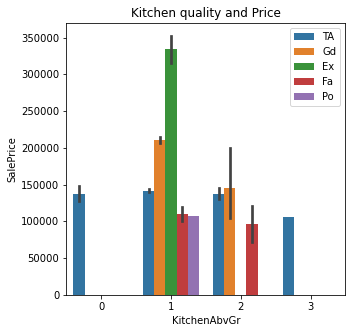

In [78]:
# Kitchen Quality vs. Price
plt.figure(figsize=(5,5))
plt.title('Kitchen quality and Price')
sns.barplot(x = 'KitchenAbvGr', y = 'SalePrice', data = housing3, hue = 'KitchenQual').legend(loc='upper right')


- Higher kitchen quality could increase house price
- Price has no significant difference in number of kitchen with same quality.

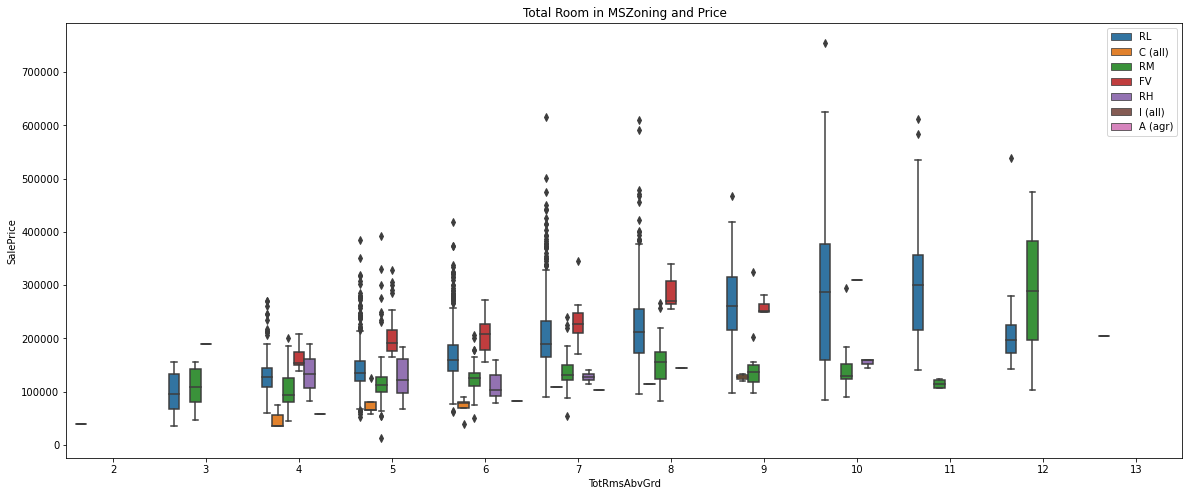

In [47]:
# Total Room (Not including bathroom) vs. Price
plt.figure(figsize=(20,8))
plt.title('Total Room in MSZoning and Price')
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = housing, hue = 'MSZoning').legend(loc='upper right')


- Floating Village Residential zoning has highest house price for total room number between 4 to 8
- Residential Low Density zoning has biggest price variance and has total room number from 3 to 12
- Residential Medium Density zoning has price jump for total room number = 12
- Residential High Density and Commercial zoning both have total room number between 4 to 6, price(RH) > price(C)

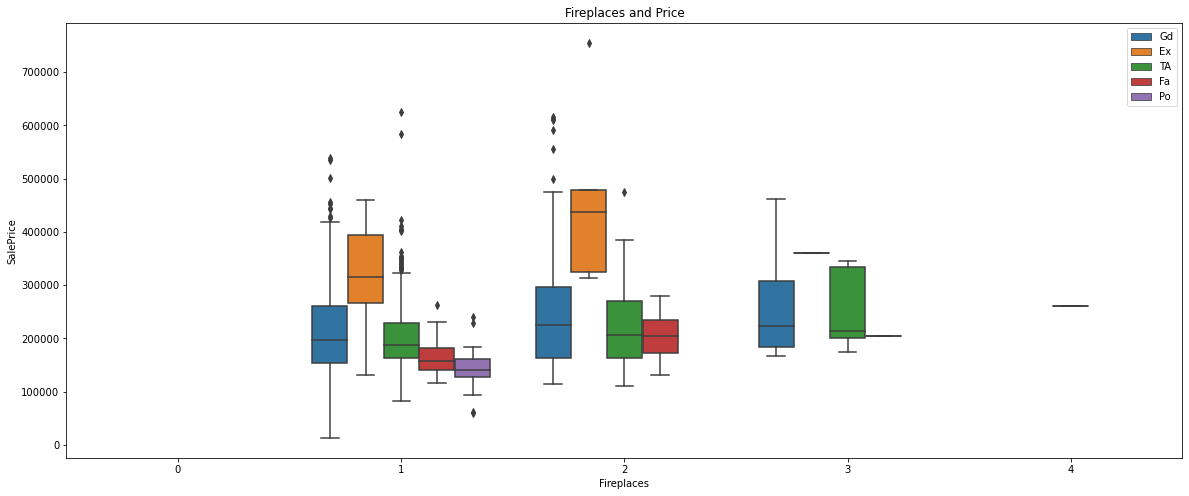

In [48]:
# Fireplaces vs. Price
plt.figure(figsize=(20,8))
plt.title('Fireplaces and Price')
sns.boxplot(x = 'Fireplaces', y = 'SalePrice', data = housing3, hue = 'FireplaceQu').legend(loc='upper right')

- Fireplaces and quality has price difference for excellent condition?

No handles with labels found to put in legend.


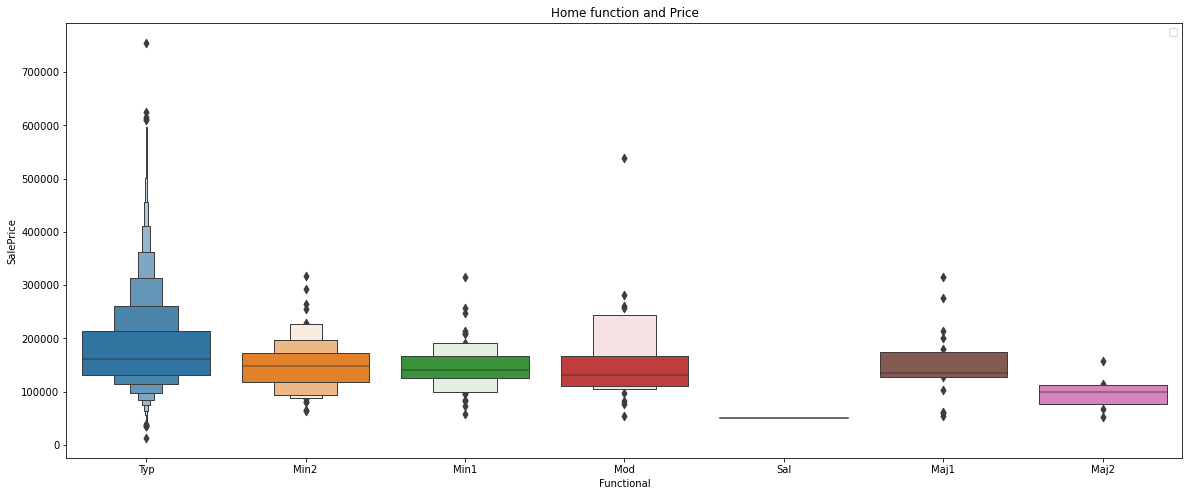

In [49]:
# Home Function vs. Price (what class should use hue=?)
plt.figure(figsize=(20,8))
plt.title('Home function and Price')
sns.boxenplot(x = 'Functional', y = 'SalePrice', data = housing3).legend(loc='upper right')

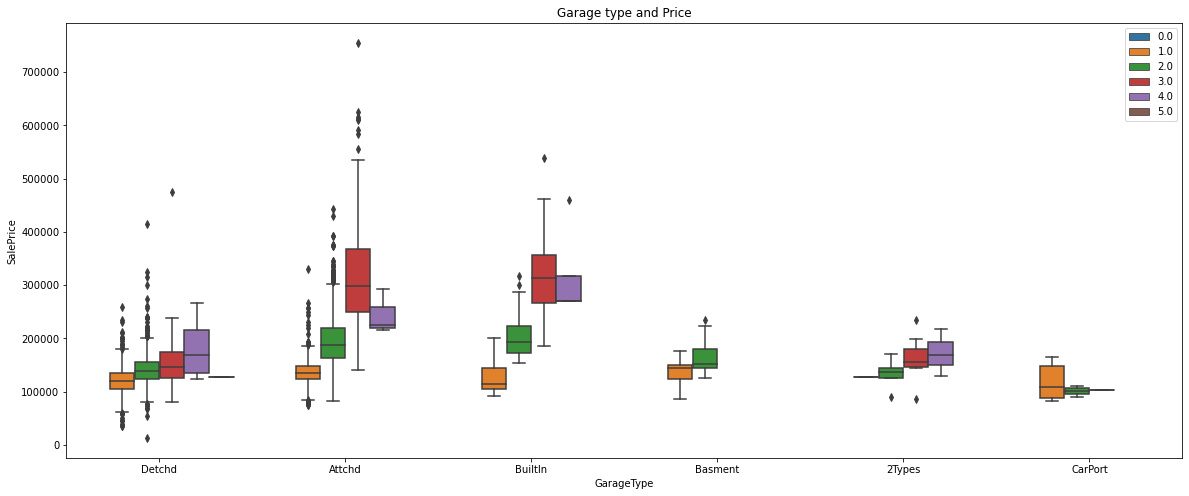

In [50]:
# Garage Type vs. Price
plt.figure(figsize=(20,8))
plt.title('Garage type and Price')
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing3, hue = 'GarageCars').legend(loc='upper right')

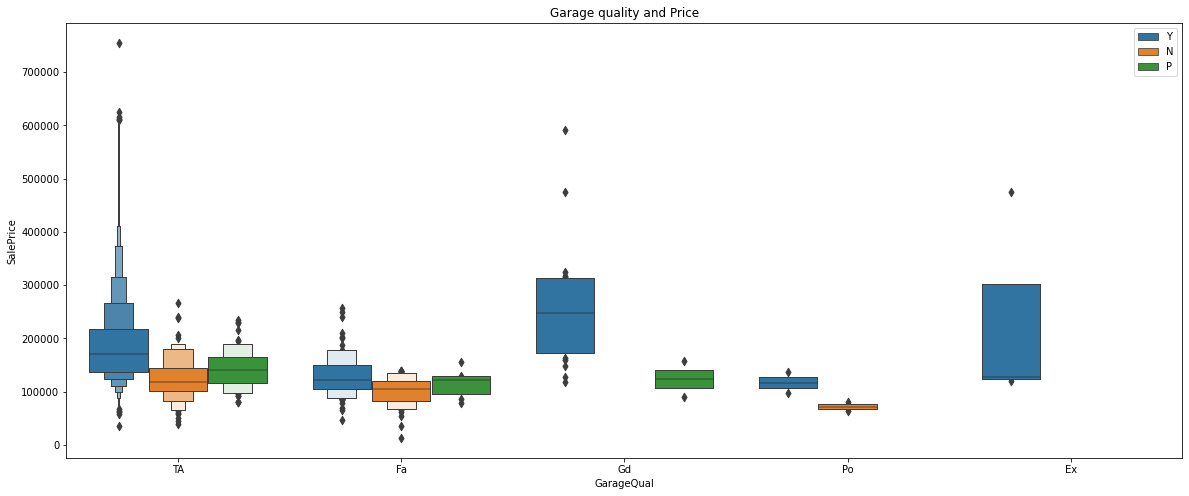

In [80]:
# Garage Condition + Paved Drive vs. Price
plt.figure(figsize=(20,8))
plt.title('Garage quality and Price')
sns.boxenplot(x = 'GarageQual', y = 'SalePrice', data = housing3, hue = 'PavedDrive').legend(loc='upper right')

- Garage with good and excellent quality, they do have paved drive way and higher house price
- Paved drive way has higher house price compare to no paved for the same garage quality

<AxesSubplot:title={'center':'Garage Year Built and Price'}, xlabel='GarageYrBlt', ylabel='SalePrice'>

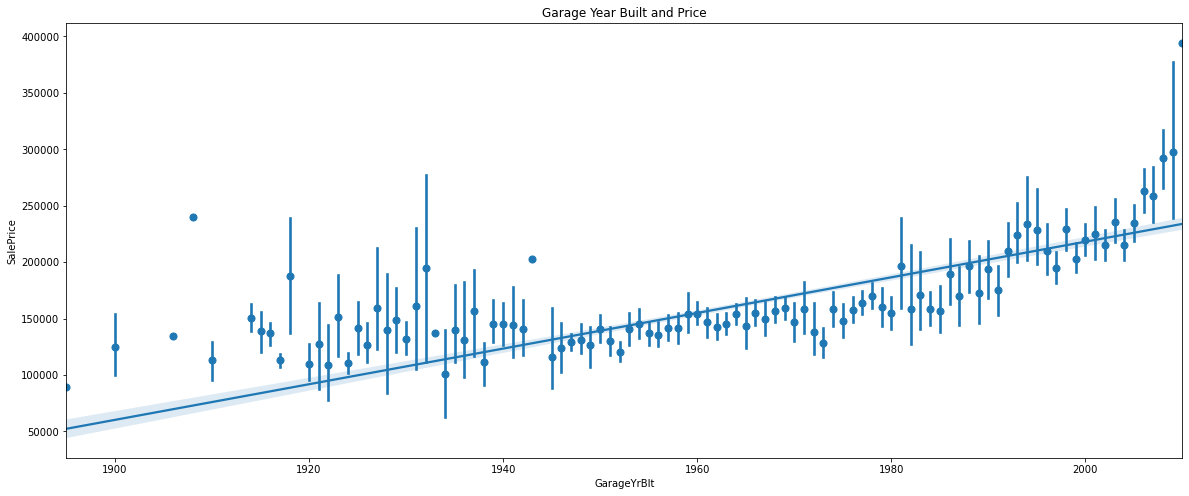

In [79]:
# Garage Year Built vs. Price
plt.figure(figsize=(20,8))
plt.title('Garage Year Built and Price')
sns.regplot(x = 'GarageYrBlt', y = 'SalePrice', data = housing3, x_estimator=np.mean)

- House price increase as more recent garage built